In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools

# import data handling tools
import cv2
import numpy as np
import pandas as pd
# import seaborn as sns
# sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import efficientnet.tfkeras as efn

In [4]:
!pip install -q efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.1 MB/s eta 0:00:00


In [14]:
datagen = ImageDataGenerator(rescale=1./255,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 721 images belonging to 5 classes.
Found 179 images belonging to 5 classes.


In [15]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0005
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Concatenate, Dense, GlobalAveragePooling2D

model = tf.keras.Sequential([
        efn.EfficientNetB0(
            input_shape=(224,224, 3),
            weights='imagenet',
            include_top=False
        ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
    ])

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Implement early stopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

16804768/16804768 [==============================] - 0s 0us/step


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b0 (Functional  (None, 7, 7, 1280)       4049564   
 )                                                               
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense_2 (Dense)             (None, 5)                 313605    
                                                                 
Total params: 4,363,169
Trainable params: 4,321,153
Non-trainable params: 42,016
_________________________________________________________________


In [18]:
history=model.fit(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=30,verbose=1)

Epoch 1/30
23/23 [==============================] - 381s 13s/step - loss: 1.7183 - accuracy: 0.3870 - val_loss: 1.8131 - val_accuracy: 0.2514 - lr: 1.0000e-04
Epoch 2/30
23/23 [==============================] - 257s 11s/step - loss: 1.2573 - accuracy: 0.5160 - val_loss: 2.0316 - val_accuracy: 0.2458 - lr: 1.0000e-04
Epoch 3/30
23/23 [==============================] - 274s 12s/step - loss: 1.0275 - accuracy: 0.6006 - val_loss: 1.9462 - val_accuracy: 0.2514 - lr: 1.0000e-04
Epoch 4/30
23/23 [==============================] - 259s 11s/step - loss: 0.9778 - accuracy: 0.5992 - val_loss: 1.8039 - val_accuracy: 0.2291 - lr: 1.0000e-04
Epoch 5/30
23/23 [==============================] - 262s 11s/step - loss: 0.8343 - accuracy: 0.6893 - val_loss: 1.7421 - val_accuracy: 0.2291 - lr: 1.0000e-04
Epoch 6/30
23/23 [==============================] - 268s 12s/step - loss: 0.7649 - accuracy: 0.7226 - val_loss: 1.8676 - val_accuracy: 0.2626 - lr: 1.0000e-04
Epoch 7/30
23/23 [============================

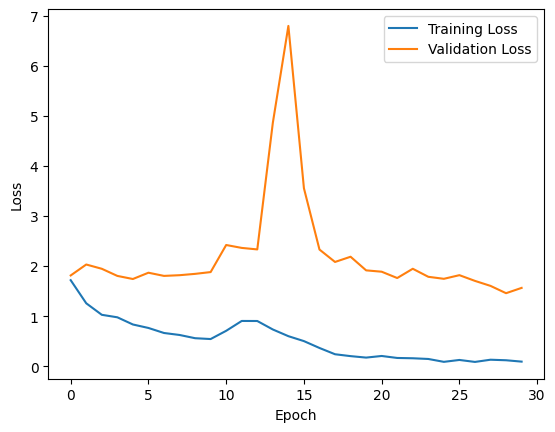

In [19]:
# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
test_data = datagen.flow_from_directory('/content/drive/MyDrive/computer vision/gaborfinal',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 731 images belonging to 5 classes.


In [21]:
evaluation_result = model.evaluate(test_data,verbose=1)

# Print the evaluation result
print("Test Loss:", evaluation_result[0])
print("Test Accuracy:", evaluation_result[1])

23/23 [==============================] - 147s 7s/step - loss: 1.3215 - accuracy: 0.6936
Test Loss: 1.321509599685669
Test Accuracy: 0.6935704350471497
